In [14]:
import pandas as pd
import datetime as dt
import numpy as np 
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

In [15]:
df = pd.read_csv(r'cleaned_data\regular_season.csv')
df.head()

,Unnamed: 0,schedule_date,schedule_season,schedule_week,team_home,score_home,team_away,score_away,points_scored,over_under_line,over_under_result,favorite,underdog,point_differential,spread,winning_team,covering_team
0,2501,1979-09-01,1979-01-01,1,Tampa Bay Buccaneers,31,Detroit Lions,16,47.0,30,over,Tampa Bay Buccaneers,Detroit Lions,15,-3.0,Tampa Bay Buccaneers,Tampa Bay Buccaneers
1,2502,1979-09-02,1979-01-01,1,Buffalo Bills,7,Miami Dolphins,9,16.0,39,under,Miami Dolphins,Buffalo Bills,2,-5.0,Miami Dolphins,Buffalo Bills
2,2503,1979-09-02,1979-01-01,1,Chicago Bears,6,Green Bay Packers,3,9.0,31,under,Chicago Bears,Green Bay Packers,3,-3.0,Chicago Bears,PUSH
3,2504,1979-09-02,1979-01-01,1,Denver Broncos,10,Cincinnati Bengals,0,10.0,31,under,Denver Broncos,Cincinnati Bengals,10,-3.0,Denver Broncos,Denver Broncos
4,2505,1979-09-02,1979-01-01,1,Kansas City Chiefs,14,Indianapolis Colts,0,14.0,37,under,Kansas City Chiefs,Indianapolis Colts,14,-1.0,Kansas City Chiefs,Kansas City Chiefs


In [16]:
df['schedule_date']= pd.to_datetime(df['schedule_date'])



In [17]:
df['schedule_season']= pd.to_datetime(df['schedule_season'])

In [18]:
df = df.drop(['Unnamed: 0'], axis=1)

In [19]:
df['schedule_season'] = pd.DatetimeIndex(df['schedule_season']).year

In [20]:
df.head()

,schedule_date,schedule_season,schedule_week,team_home,score_home,team_away,score_away,points_scored,over_under_line,over_under_result,favorite,underdog,point_differential,spread,winning_team,covering_team
0,1979-09-01,1979,1,Tampa Bay Buccaneers,31,Detroit Lions,16,47.0,30,over,Tampa Bay Buccaneers,Detroit Lions,15,-3.0,Tampa Bay Buccaneers,Tampa Bay Buccaneers
1,1979-09-02,1979,1,Buffalo Bills,7,Miami Dolphins,9,16.0,39,under,Miami Dolphins,Buffalo Bills,2,-5.0,Miami Dolphins,Buffalo Bills
2,1979-09-02,1979,1,Chicago Bears,6,Green Bay Packers,3,9.0,31,under,Chicago Bears,Green Bay Packers,3,-3.0,Chicago Bears,PUSH
3,1979-09-02,1979,1,Denver Broncos,10,Cincinnati Bengals,0,10.0,31,under,Denver Broncos,Cincinnati Bengals,10,-3.0,Denver Broncos,Denver Broncos
4,1979-09-02,1979,1,Kansas City Chiefs,14,Indianapolis Colts,0,14.0,37,under,Kansas City Chiefs,Indianapolis Colts,14,-1.0,Kansas City Chiefs,Kansas City Chiefs


In [21]:
season_results = df.groupby(['schedule_season','schedule_week'],as_index=False)
season_results.head()

,schedule_date,schedule_season,schedule_week,team_home,score_home,team_away,score_away,points_scored,over_under_line,over_under_result,favorite,underdog,point_differential,spread,winning_team,covering_team
0,1979-09-01,1979,1,Tampa Bay Buccaneers,31,Detroit Lions,16,47.0,30,over,Tampa Bay Buccaneers,Detroit Lions,15,-3.0,Tampa Bay Buccaneers,Tampa Bay Buccaneers
1,1979-09-02,1979,1,Buffalo Bills,7,Miami Dolphins,9,16.0,39,under,Miami Dolphins,Buffalo Bills,2,-5.0,Miami Dolphins,Buffalo Bills
2,1979-09-02,1979,1,Chicago Bears,6,Green Bay Packers,3,9.0,31,under,Chicago Bears,Green Bay Packers,3,-3.0,Chicago Bears,PUSH
3,1979-09-02,1979,1,Denver Broncos,10,Cincinnati Bengals,0,10.0,31,under,Denver Broncos,Cincinnati Bengals,10,-3.0,Denver Broncos,Denver Broncos
4,1979-09-02,1979,1,Kansas City Chiefs,14,Indianapolis Colts,0,14.0,37,under,Kansas City Chiefs,Indianapolis Colts,14,-1.0,Kansas City Chiefs,Kansas City Chiefs
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10797,2024-01-06,2024,18,Baltimore Ravens,10,Pittsburgh Steelers,17,27.0,34,under,Pittsburgh Steelers,Baltimore Ravens,7,-3.0,Pittsburgh Steelers,Pittsburgh Steelers
10798,2024-01-07,2024,18,Arizona Cardinals,20,Seattle Seahawks,21,41.0,48,under,Seattle Seahawks,Arizona Cardinals,1,-3.0,Seattle Seahawks,Arizona Cardinals
10799,2024-01-07,2024,18,Carolina Panthers,0,Tampa Bay Buccaneers,9,9.0,36,under,Tampa Bay Buccaneers,Carolina Panthers,9,-4.5,Tampa Bay Buccaneers,Tampa Bay Buccaneers
10800,2024-01-07,2024,18,Cincinnati Bengals,31,Cleveland Browns,14,45.0,37,over,Cincinnati Bengals,Cleveland Browns,17,-7.0,Cincinnati Bengals,Cincinnati Bengals


In [22]:
team_wins = df.groupby(['winning_team'],as_index=False).count()
team_wins

,winning_team,schedule_date,schedule_season,schedule_week,team_home,score_home,team_away,score_away,points_scored,over_under_line,over_under_result,favorite,underdog,point_differential,spread,covering_team
0,Arizona Cardinals,288,288,288,288,288,288,288,288,288,288,288,288,288,288,288
1,Atlanta Falcons,323,323,323,323,323,323,323,323,323,323,323,323,323,323,323
2,Baltimore Ravens,256,256,256,256,256,256,256,256,256,256,256,256,256,256,256
3,Buffalo Bills,363,363,363,363,363,363,363,363,363,363,363,363,363,363,363
4,Carolina Panthers,214,214,214,214,214,214,214,214,214,214,214,214,214,214,214
5,Chicago Bears,354,354,354,354,354,354,354,354,354,354,354,354,354,354,354
6,Cincinnati Bengals,316,316,316,316,316,316,316,316,316,316,316,316,316,316,316
7,Cleveland Browns,267,267,267,267,267,267,267,267,267,267,267,267,267,267,267
8,Dallas Cowboys,399,399,399,399,399,399,399,399,399,399,399,399,399,399,399
9,Denver Broncos,402,402,402,402,402,402,402,402,402,402,402,402,402,402,402


In [23]:
team_wins = team_wins.sort_values('schedule_date',ascending=False)
team_wins = team_wins[['winning_team','schedule_date']]

In [24]:
team_wins = team_wins.rename(columns = {'winning_team':'team','schedule_date':'wins'})
team_wins


,team,wins
26,Pittsburgh Steelers,425
21,New England Patriots,419
27,San Francisco 49ers,405
9,Denver Broncos,402
11,Green Bay Packers,401
8,Dallas Cowboys,399
25,Philadelphia Eagles,395
15,Kansas City Chiefs,392
19,Miami Dolphins,386
20,Minnesota Vikings,379


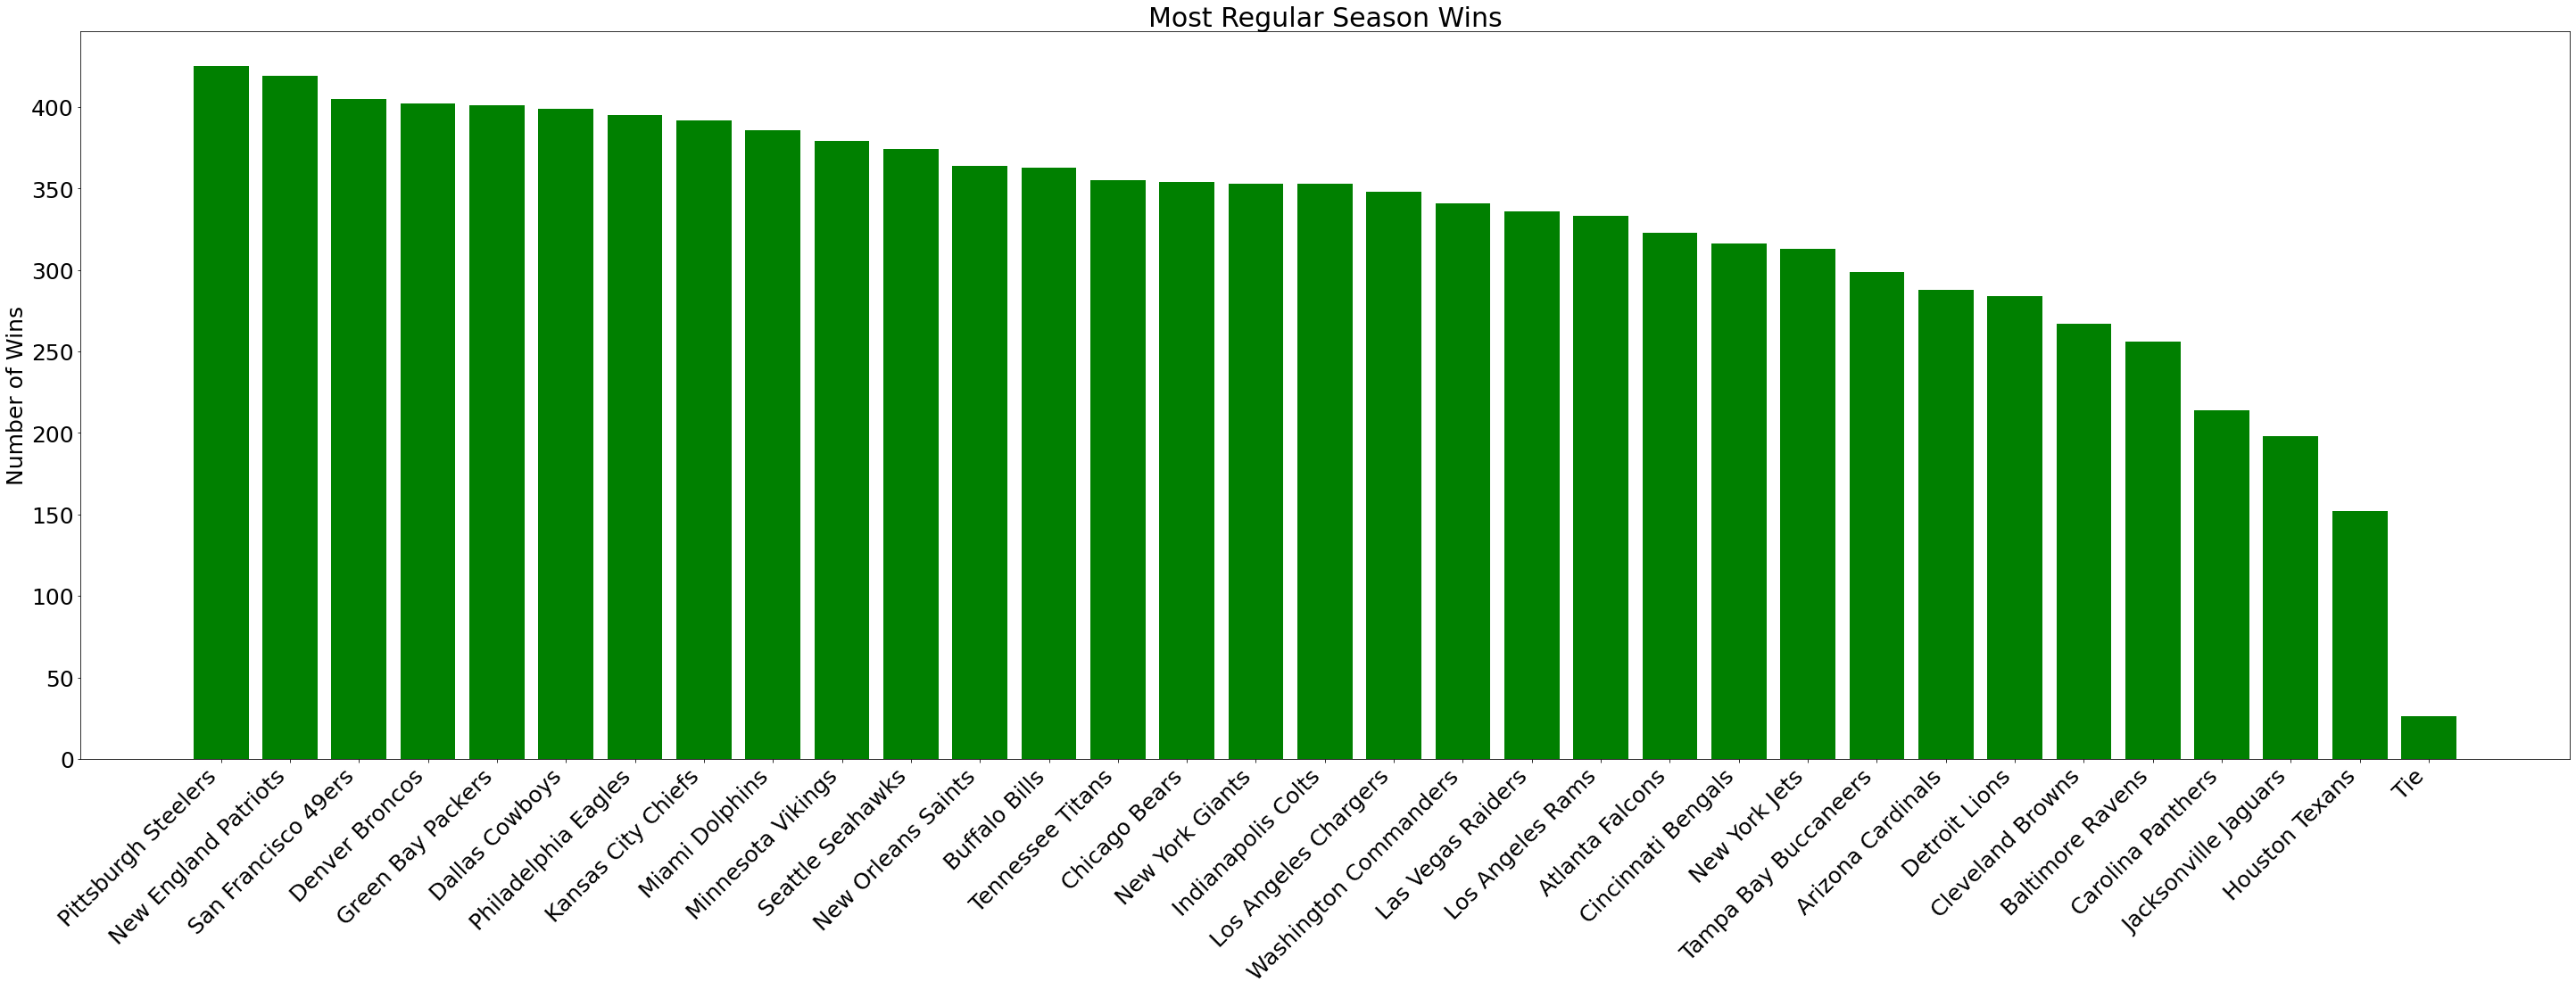

In [25]:
x = team_wins['team']
y = team_wins['wins']
color = ['green']
plt.bar(x,y,color = color)
plt.title('Most Regular Season Wins',fontsize = 30)
plt.xticks(rotation=45 , horizontalalignment = 'right',fontsize=25)
plt.yticks(fontsize = 25)

plt.ylabel('Number of Wins',fontsize=25)


plt.rcParams["figure.figsize"] = (50,15)
plt.savefig('charts/regular_season_wins.pdf',bbox_inches='tight')

In [26]:
'''plt.scatter(team_wins.winning_team,team_wins.covering_team)
plt.title('Regular Season Wins',fontsize = 30)
plt.xticks(rotation=45 , horizontalalignment = 'right',fontsize=25)
plt.yticks(fontsize = 25)
#
plt.show()'''

"plt.scatter(team_wins.winning_team,team_wins.covering_team)\nplt.title('Regular Season Wins',fontsize = 30)\nplt.xticks(rotation=45 , horizontalalignment = 'right',fontsize=25)\nplt.yticks(fontsize = 25)\n#\nplt.show()"